<h1>Random Forest</h1>

Random Forest is a machine learning tool that takes random data points from random variables to come up with multiple decision trees. The output of each tree is then combined to make a final prediction, resulting in more accurate models. 

Since our cleaned data set has over 60,000 data points including 2 numeric and 9 categorical variables, Random Forest is a suitable algorithm as it can analyse large datasets with many features and high dimensionality. Additionally, Random Forest avoids the problem of overfitting by using multiple decision trees which improves the generalisation ability of the model. Finally, Random Forest can handle a mix of categorical and numerical data which suits our data set specifically, helping to improve the accuracy of our predictions.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sb.set() # set the default Seaborn style for graphics

In [2]:
# Loading cleaned data set
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0


<h1>Variables</h1>

From our Exploratory Data Analysis, a total of 2 numeric and 9 categorical variables that are significantly correlated with diabetes were identified. For Random Forest, categorical values have been converted into numerical values for easy processing.

In [3]:
# Creating dataframe with only significant independent variables
diabetes_dataset = pd.DataFrame(diabetes[['Diabetes_binary','BMI','PhysHlth','HighBP','HighChol','Smoker','HeartDiseaseorAttack','PhysActivity','GenHlth','DiffWalk','Age','Income']])
diabetes_dataset.head()

,Diabetes_binary,BMI,PhysHlth,HighBP,HighChol,Smoker,HeartDiseaseorAttack,PhysActivity,GenHlth,DiffWalk,Age,Income
0,0.0,33.0,0.0,1,0.0,0.0,0.0,1,2.0,1.0,7,9.0
1,0.0,27.0,2.0,0,1.0,1.0,0.0,1,2.0,0.0,7,6.0
2,0.0,26.0,30.0,0,1.0,1.0,0.0,0,3.0,0.0,13,3.0
3,0.0,19.0,0.0,0,0.0,1.0,0.0,1,3.0,0.0,11,7.0
4,0.0,37.0,0.0,1,0.0,0.0,0.0,1,2.0,0.0,5,3.0


In [4]:
# Check if variable data has been changed to type int/float
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       67136 non-null  float64
 1   BMI                   67136 non-null  float64
 2   PhysHlth              67136 non-null  float64
 3   HighBP                67136 non-null  int64  
 4   HighChol              67136 non-null  float64
 5   Smoker                67136 non-null  float64
 6   HeartDiseaseorAttack  67136 non-null  float64
 7   PhysActivity          67136 non-null  int64  
 8   GenHlth               67136 non-null  float64
 9   DiffWalk              67136 non-null  float64
 10  Age                   67136 non-null  int64  
 11  Income                67136 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 6.1 MB


In [5]:
# Rename the reponse variable column to "Diabetes" to make it more intuitive
diabetes_dataset.rename(columns={"Diabetes_binary": "Diabetes"}, inplace=True) 

# Isolate dependent variable to fit into the model
labels = diabetes_dataset.pop("Diabetes")

<h1>Train and Test Set</h1>

Our data set will be randomly split into two sets with 75% of the data forming the train set and the remaining 25% forming the test set.

The train set will be fitted into the parameters of Random Forest where the coefficients of the model are adjusted to minimise the difference between the predicted and the actual values for diabetes based on the given independent variables.

The test set is then used to evaluate the performance of the trained model to simulate how well the model can make predictions for diabetes on new and unseen data.

The train and test sets are kept completely separate to avoid overfitting the model to the train data. Overfitting occurs when the model makes predictions based on memory of data in the train set rather than trends, which causes it to perform poorly on new data. By evaluating the performance of the model on a separate test set, a better estimate is returned.

In [6]:
# Import random split tool
from sklearn.model_selection import train_test_split

In [7]:
# Split data randomly into 75% train set and 25% test set
x_train, x_test, y_train, y_test = train_test_split(diabetes_dataset, labels, test_size = 0.25, random_state = 0)

<h1> ROC Curve and AUC </h1>

ROC curve is a graphical plot that compares the true positive rate (TPR) and false positive rate (FPR) at different classification thresholds. TPR is the number of correctly predicted positive cases out of the total number of positive cases, while FPR is the number of incorrectly predicted positive cases to the total number of negative cases.

AUC is a metric that summarises the performance of the classifier based on the ROC curve. It is the area under the ROC curve which measures the overall performance of the model across all possible classification thresholds. AUC is a measure of the prediction accuracy of the model which ranges from 0 to 1, with 0 representing a poor classifier and 1 representing a perfect classifier.

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1, random_state = 0)
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Fit random forest model onto train set
rf.fit(x_train, y_train)

# Predicting value of diabetes from the independent variables
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [9]:
# Print accuracy for test set
print("Accuracy for test set: ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy for test set:  0.7041825548141086


<h1>Confusion Matrix</h1>

A confusion matrix is a useful visualisation tool to evaluate the performance of a classification model by summarising the predicted and actual values of the test data to determine the accuracy of its predictions.

The TPR can be found by dividing the true positives identified by the total actual positives. The FPR can be found by divding the false positives identified by the total actual negatives. Comparing the TPR and FPR gives us an indication of how well the model can correctly identify whether an individual has diabetes based on the individual's factors.

<Axes: >

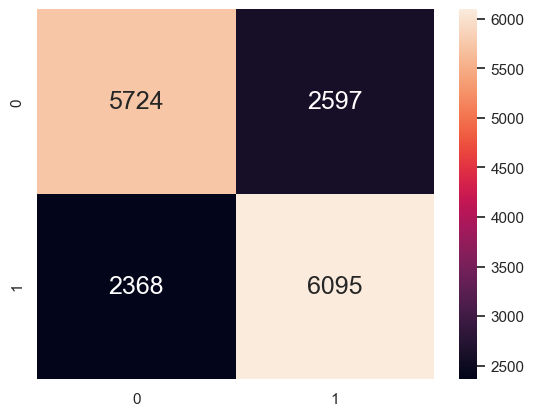

In [10]:
# Plot the confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [11]:
# Check the Goodness of Fit (on Train Data)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

tpr_train = tp_train / (fn_train + tp_train)
fpr_train = fp_train / (fp_train + tn_train)
print("Goodness of Fit of Model \t:Train Dataset")
print("True positive rate \t=", tpr_train)
print("False positive rate \t=", fpr_train)

print()
# Check the Goodness of Fit (on Test Data)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

tpr_test = tp_test / (fn_test + tp_test)
fpr_test = fp_test / (fp_test + tn_test)
print("Goodness of Fit of Model \t:Test Dataset")
print("True positive rate \t=", tpr_test)
print("False positive rate \t=", fpr_test)

Goodness of Fit of Model 	:Train Dataset
True positive rate 	= 0.9578968333001394
False positive rate 	= 0.036043886402344835

Goodness of Fit of Model 	:Test Dataset
True positive rate 	= 0.7201937847099137
False positive rate 	= 0.31210191082802546


<h1>Optimisation</h1>

The Random Forest model can be further optimised by finding the optimal number of estimators that will give the highest AUC score. A suitable estimator value has to be chosen to maximise prediction accuracy yet minimise overfitting of the data. Increasing estimator values will be tried on the Random Forest model to finding the peak of the ROC curve, which will help us identify the highest AUC score that also gives us the optimal estimator value. 

In [12]:
# Finding accuracy at different estimator values to find optimal estimator
estimator_level = [1, 2, 4, 8, 16, 32, 64, 128, 256]
train_results = []
test_results = []

for estimator in estimator_level:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state = 0)
    rf.fit(x_train, y_train)
    y_train_pred = rf.predict(x_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
    accuracy = auc(fpr, tpr)
    train_results.append(accuracy)
    y_test_pred = rf.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    accuracy = auc(fpr, tpr)
    test_results.append(accuracy)

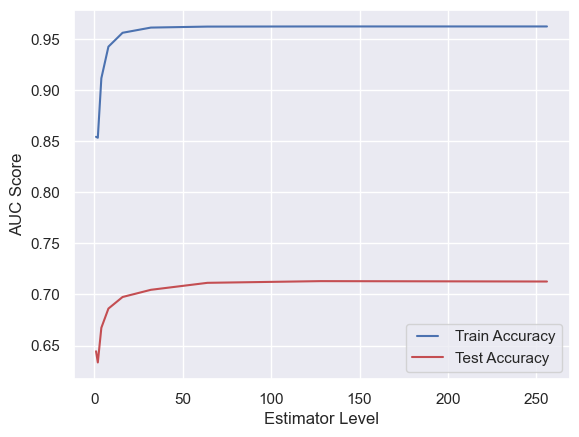

In [13]:
# Plotting the curve
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estimator_level, train_results, "b", label = "Train Accuracy")
line2, = plt.plot(estimator_level, test_results, "r", label = "Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("Estimator Level")
plt.show()

<h1>Analysis of Results</h1>

From the curve, the AUC score for both the train and test set is optimal at an estimator level of 60. Beyond this level, AUC score does not improve much more for each increase in estimator level. Hence, 60 is a sufficient number of estimators. The Random Forest model is refitted with the new estimator level to find the optimal accuracy level.

In [14]:
# Re-fitting model with optimal estimator value
rf = RandomForestClassifier(n_estimators=60, n_jobs=-1, random_state = 0)
rf.fit(x_train, y_train)

# Predicting values of diabetes again
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [15]:
# Generating accuracy for test set
print("Accuracy for test set: ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy for test set:  0.7102597712106768


<Axes: >

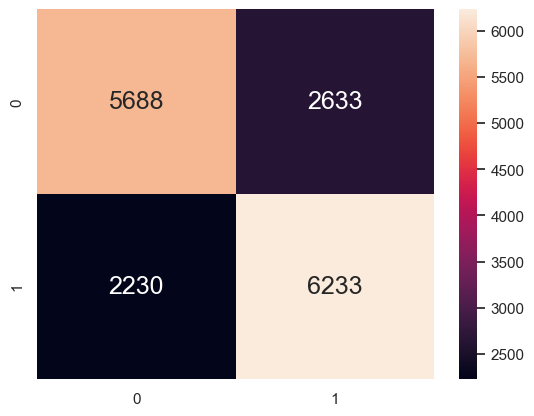

In [16]:
# Print confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [17]:
# Check the Goodness of Fit (on Train Data)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

tpr_train = tp_train / (fn_train + tp_train)
fpr_train = fp_train / (fp_train + tn_train)
print("Goodness of Fit of Model \t:Train Dataset")
print("True positive rate \t=", tpr_train)
print("False positive rate \t=", fpr_train)

print()
# Check the Goodness of Fit (on Test Data)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

tpr_test = tp_test / (fn_test + tp_test)
fpr_test = fp_test / (fp_test + tn_test)
print("Goodness of Fit of Model \t:Test Dataset")
print("True positive rate \t=", tpr_test)
print("False positive rate \t=", fpr_test)

Goodness of Fit of Model 	:Train Dataset
True positive rate 	= 0.9584544911372237
False positive rate 	= 0.03422188774903949

Goodness of Fit of Model 	:Test Dataset
True positive rate 	= 0.7365000590807043
False positive rate 	= 0.31642831390457876


<h1>Final Prediction Accuracy</h1>

The initial TPR (0.72019) of the test set and FPR (0.31210) has been improved in the final TPR (0.73650) and FPR (0.31643). There is an increase in TPR by 0.01631 and a slight increase in FPR by 0.00433. Although the FPR increased slightly, this is outweighed by the increase in TPR. Identifying true positives is more important than false positives as correctly diagnosing diabetes is important for treatment. Hence after optimisation, the model is able to correctly identify more true positives.

The accuracy of the test set using an estimator value of 60 is 0.71026, which is slightly higher than the initial estimator value of 30 which gives 0.70418. There is an increase in accuracy but only by a small amount of 0.00608. This means that the independent variables chosen were significantly correlated with diabetes from the start. Hence, after adjusting the number of estimators to 60, the Random Forest model can correctly identify individuals with diabetes and individuals without diabetes 71.0% of the time, which is quite a high accuracy level.

However, other models can still be explored to further improve the accuracy of prediction. Next, we will analyse the data using the Logistic Regression model.